In [1]:
# unsuperwised learning
# day 1
# Kmeans Clustering using iris datasets
from sklearn.datasets import load_iris
# loading the model 
from sklearn.cluster import KMeans

In [2]:
x = load_iris()
print(x.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
samples = x.data
print(samples[:3,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [4]:
# fitting the mode
kmeans = KMeans(n_clusters=3)
kmeans.fit(samples)

KMeans(n_clusters=3)

In [8]:
labels = kmeans.predict(samples)

In [9]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [11]:
test_sample =[[ 5.7 ,4.4, 1.5, 0.4],
              [ 6.5 ,3. ,5.5 ,1.8],
              [ 5.8 ,2.7, 5.1, 1.9]]

In [12]:
labels_test = kmeans.predict(test_sample)

In [13]:
print(labels_test)

[1 2 0]


In [15]:
# ploting the scatter plot
import matplotlib.pyplot as plt
print(x.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


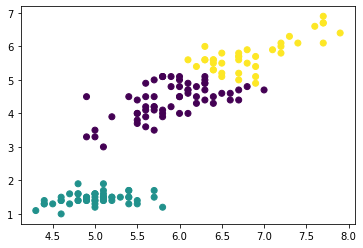

In [18]:
# plot against sepal length to petal length
sl = x.data[:,0]
pl = x.data[:,2]
sw = x.data[:,1]
pw = x.data[:,3]
plt.scatter(sl,pl,c = labels)
plt.show()

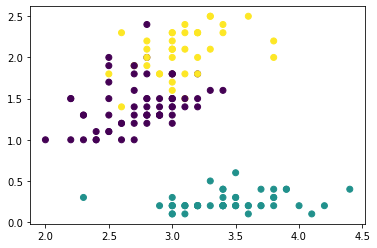

In [19]:
plt.scatter(sw,pw,c=labels)

In [20]:
# finding the cerntroids
center = kmeans.cluster_centers_

In [21]:
center

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

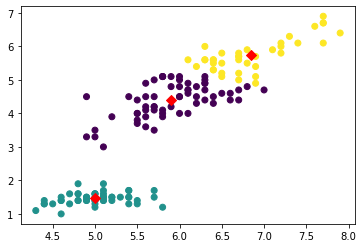

In [36]:
sl = x.data[:,0]
pl = x.data[:,2]
c_1 = center[:,0]
c_2 = center[:,2]
plt.scatter(sl,pl,c = labels)
plt.scatter(c_1,c_2, marker ='D',c='r', s =50)
plt.show()

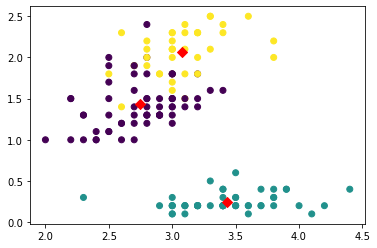

In [37]:
# centrid for the sepal width and petal width
sw = x.data[:,1]
pw = x.data[:,3]
c_3 = center[:,1]
c_4 = center[:,3]
plt.scatter(sw,pw,c=labels)
plt.scatter(c_3,c_4, marker ='D',c='r', s =50)

### measuring the quality of the kmeans via inertia
inertia measures how the clusters are spread out,by analysing the distance from each point in the cluster to it's centroid. kmeans try to minimize the inertia >
model.inertia_
Increasing the amount of clusters will reduce the inertia
An optimal clustering should have lower inertia and not too many clusters 


In [5]:
print(kmeans.inertia_)

78.851441426146


Text(0, 0.5, 'inertia')

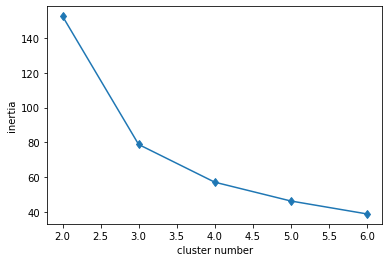

In [10]:
# creating a inertia curve
import matplotlib.pyplot as plt
l_in = []
for k in range(2,7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(samples)
    l_in.append(kmeans.inertia_)
plt.plot(range(2,7), l_in, '-d')
plt.xlabel('cluster number')
plt.ylabel('inertia')


Note: in kmeans clustering the varience of a feature has higher influence on the algorithm so that scaling the features is an important factor  
standard scaling  mean 0 varience 1

In [23]:
# creating pipeline for standardization
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import pandas as pd


In [18]:
wine = load_wine()
print(wine.keys())
print(wine.feature_names)
samples = wine.data
print(wine.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [19]:
# initailizing the model and scalar
kmeans = KMeans(n_clusters= 3)
scaler = StandardScaler()

In [20]:
# creating the pipeline
pipeline = make_pipeline(scaler,kmeans)

In [21]:
tar = wine.target

In [22]:
pipeline.fit(samples)
labels = pipeline.predict(samples)

In [24]:
df = pd.DataFrame({'labels':labels, 'tar': tar})

In [25]:
ctab = pd.crosstab(df['labels'], df['tar'])

In [26]:
ctab

tar,0,1,2
labels,,,
0,0,65,0
1,0,3,48
2,59,3,0


Note: StandardScaler applied to each feature 
and Noramlization applied to each samples

In [27]:
from sklearn.preprocessing import Normalizer

In [29]:
norm = Normalizer()
pipe = make_pipeline(norm, kmeans)
pipe.fit(samples)
labels = pipe.predict(samples)
df = pd.DataFrame({'labels':labels, 'tar': tar})
ctab = pd.crosstab(df['labels'], df['tar'])
print(ctab) # does not lead to better results


tar      0   1   2
labels            
0        0  33   4
1       51   5   4
2        8  33  40
